In [1]:
import numpy as np
import pandas as pd

lookup = pd.DataFrame()
lookup = pd.read_csv('xgboost_output_new.csv')

In [5]:
stationid =1
x = 0

for index, row in lookup.iterrows():
    tempx = lookup.at[index, 'PUlongitude']
    if tempx != x:
        x = tempx
        stationid = stationid + 1
    lookup.at[index, 'start'] = int(stationid)
    
for index, row in lookup.iterrows():
    x = lookup[lookup['PUlongitude']==lookup.at[index, 'DOlongitude']]
    print(x)
    requiredid = x.start.values[1]
    lookup.at[index, 'end'] = requiredid

<IPython.core.display.Javascript object>


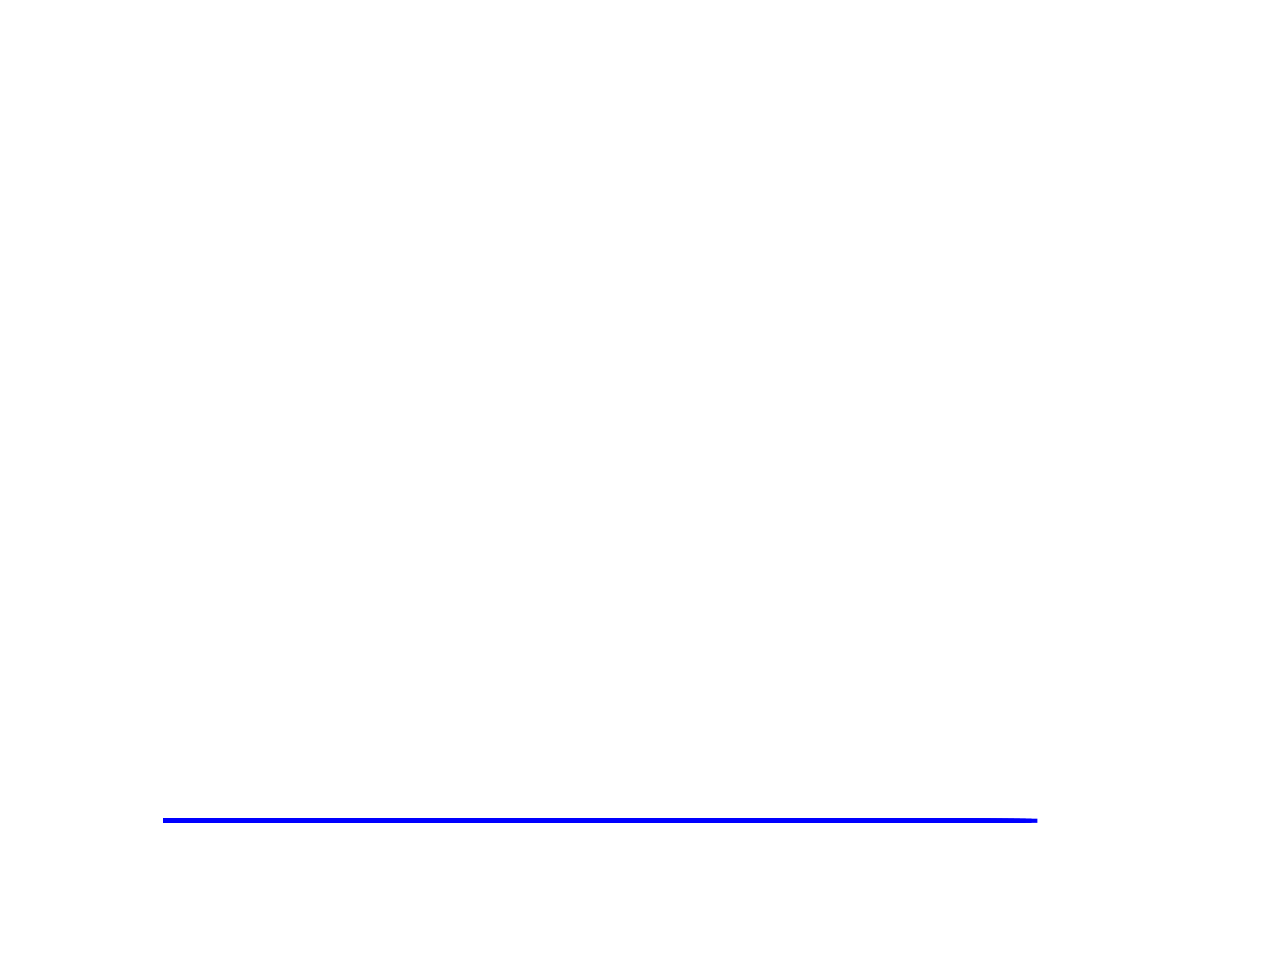

In [12]:
import time
import psutil
import matplotlib.pyplot as plt
%matplotlib notebook
plt.rcParams['animation.html'] = 'jshtml'
fig = plt.figure()
ax = plt.subplot(111)
fig.show()

In [13]:
#Calculate distance sum in a population

def CalcDistance(population):
    sumdistance = 0
    for i in range(0,len(population)-1):
        cityAindex = population[i]
        cityBindex = population[i+1]
        sumdistance = sumdistance + Dis2Points(cityAindex,cityBindex)
    return sumdistance  
        

def Dis2Points(x,y):
    dis = lookup[(lookup.start == x) & (lookup.end == y)].Trip_Duration
    return dis.array[0]
        
def CalDisAllInGeneration(pop):
    dis = []
    for i in range(0,len(pop)):
        dis.append(CalcDistance(pop[i]))
    return dis

def CalFitAllInGeneration(newdist):
    fitness = []
    sumfit = 0
    for i in range(0,len(newdist)):
        sumfit = sumfit + newdist[i]
    for i in range(0,len(newdist)):
        fitness.append((newdist[i]/sumfit)*1000)
    return fitness

def pickOne(pop,fit):
    r = random.random()
    index = 0
    while(r<0):
        r = r - fit[index]
        index = index + 1
    index = index - 1
    return pop[index]

def swap(item, index1, index2):
    temp = item[index1]
    item[index1] = item[index2]
    item[index2] = temp
    return item

def mutate(item,rate):
    for i in range(len(item)):
        if(random.random() < rate):
            indextoswap = random.randint(0,len(item)-1)
            item = swap(item,i,indextoswap)
    return item

# next generation

def newGeneration(population,fitness):
    newpopulation = []
    newlist = []
    for i in range(len(population)):
        iterate = True
        while(iterate):
            newA = pickOne(population,fitness)
            newB = pickOne(population,fitness)
            crossedover = crossover(newA,newB,crossoverchance)
            mutated = tuple(mutate(crossedover,mutationrate))
            if i == 0:
                newpopulation.append(mutated)
                iterate = False
            if(i>0 and mutated != newpopulation[len(newpopulation)-1]):
                newpopulation.append(tuple(mutated))
                iterate = False
    newlist = tupletolist(newpopulation)
    return newlist

def tupletolist(tuplesample):
    listsample = []
    for i in range(0,len(tuplesample)):
        populationitemlist = []
        temp = tuplesample[i]
        for j in range(0,len(tuplesample[i])):
            populationitemlist.append(temp[j])
        listsample.append(populationitemlist)
    return listsample

def crossover(A,B,chance):
    if(random.random() < chance):
        p = int(random.random() * len(A))
        q = int(random.random() * len(A))
        start = min(p,q)
        end = max(p,q)
        childP1 , childP2 = [] , []
        for i in range(start, end):
            childP1.append(A[i])  
        childP2 = [item for item in B if item not in childP1]
        newA = childP1 + childP2
    else:
        newA = A
    return newA      

In [14]:
import random

lengthofpopulation = 10
numberofgenerations = 150

selectlistSpots = list(lookup.start.unique())

mutationrate = 0.1
crossoverchance = 0.5
x, y = [], []

bestfitnessvalue = 0
bestroute = []
bestpopulation = []
bestfitness = []
populationlist =[]
random.shuffle(selectlistSpots)

savelistSpots = selectlistSpots

population = []
#Create population
for i in range(0,lengthofpopulation):
    random.shuffle(selectlistSpots)
    population.append(tuple(selectlistSpots))

bestpopulation = tupletolist(population)
populationlist = bestpopulation
print("best")
print(len(bestpopulation[0]))

i=0
generation = "G" + str(i)
while(i<numberofgenerations):
    print('*******{}********'.format(generation))
    maxfitnessofcurrentpopulation = 0
    distance = []
    fitness = []
    if(generation != "G0"):
        print(bestpopulation[0])
        print(len(bestpopulation[0]))
        populationlist = newGeneration(bestpopulation,bestfitness)
    distance = CalDisAllInGeneration(populationlist)
    fitness = CalFitAllInGeneration(distance)
    maxfitnessofcurrentpopulation = max(fitness)
    print("max fitness of current population")
    print(maxfitnessofcurrentpopulation)
    indeofmaxfitnessofcurrentpopulation = fitness.index(max(fitness))
    if bestfitnessvalue < maxfitnessofcurrentpopulation:
        bestfitnessvalue = maxfitnessofcurrentpopulation
        bestroute = populationlist[indeofmaxfitnessofcurrentpopulation]
    bestpopulation = populationlist
    bestfitness = fitness
    generation = "G" + str(i+1)
    i=i+1
    print("best fitness")
    print(bestfitnessvalue)
    print("***************\n")
    x.append(i)
    y.append(maxfitnessofcurrentpopulation)
    ax.plot(x, y, color='b')
    fig.canvas.draw()
    ax.set_xlim(left=0, right=numberofgenerations+20)

best
11
*******G0********
max fitness of current population
114.23319423119604
best fitness
114.23319423119604
***************

*******G1********
[10.0, 11.0, 3.0, 7.0, 4.0, 12.0, 2.0, 5.0, 6.0, 8.0, 9.0]
11
max fitness of current population
112.42350349325184
best fitness
114.23319423119604
***************

*******G2********
[2.0, 10.0, 12.0, 3.0, 11.0, 9.0, 4.0, 7.0, 8.0, 6.0, 5.0]
11
max fitness of current population
121.23621081357871
best fitness
121.23621081357871
***************

*******G3********
[10.0, 12.0, 9.0, 11.0, 2.0, 8.0, 5.0, 4.0, 7.0, 3.0, 6.0]
11
max fitness of current population
115.37320417893515
best fitness
121.23621081357871
***************

*******G4********
[8.0, 7.0, 6.0, 10.0, 3.0, 9.0, 11.0, 2.0, 5.0, 12.0, 4.0]
11
max fitness of current population
123.35775495518854
best fitness
123.35775495518854
***************

*******G5********
[2.0, 6.0, 10.0, 8.0, 9.0, 11.0, 7.0, 3.0, 5.0, 12.0, 4.0]
11
max fitness of current population
111.49173299009007
best fitnes

*******G46********
[5.0, 7.0, 3.0, 10.0, 11.0, 9.0, 8.0, 6.0, 4.0, 12.0, 2.0]
11
max fitness of current population
110.35519676966615
best fitness
138.58501255662281
***************

*******G47********
[7.0, 11.0, 4.0, 2.0, 9.0, 3.0, 10.0, 5.0, 12.0, 8.0, 6.0]
11
max fitness of current population
128.00852321100533
best fitness
138.58501255662281
***************

*******G48********
[8.0, 2.0, 10.0, 9.0, 3.0, 11.0, 5.0, 4.0, 12.0, 7.0, 6.0]
11
max fitness of current population
111.90627908147076
best fitness
138.58501255662281
***************

*******G49********
[6.0, 12.0, 5.0, 9.0, 10.0, 4.0, 2.0, 7.0, 8.0, 3.0, 11.0]
11
max fitness of current population
114.9248953917572
best fitness
138.58501255662281
***************

*******G50********
[11.0, 4.0, 10.0, 9.0, 5.0, 12.0, 2.0, 7.0, 8.0, 3.0, 6.0]
11
max fitness of current population
108.1207756778262
best fitness
138.58501255662281
***************

*******G51********
[10.0, 2.0, 4.0, 6.0, 9.0, 5.0, 8.0, 7.0, 12.0, 11.0, 3.0]
11
max fi

*******G91********
[8.0, 4.0, 2.0, 11.0, 5.0, 12.0, 6.0, 10.0, 3.0, 9.0, 7.0]
11
max fitness of current population
116.39034601987134
best fitness
138.58501255662281
***************

*******G92********
[6.0, 12.0, 8.0, 11.0, 3.0, 10.0, 5.0, 4.0, 9.0, 7.0, 2.0]
11
max fitness of current population
106.51802315996521
best fitness
138.58501255662281
***************

*******G93********
[5.0, 6.0, 8.0, 10.0, 12.0, 11.0, 3.0, 9.0, 2.0, 4.0, 7.0]
11
max fitness of current population
115.64936529799222
best fitness
138.58501255662281
***************

*******G94********
[5.0, 6.0, 12.0, 10.0, 8.0, 11.0, 3.0, 9.0, 2.0, 4.0, 7.0]
11
max fitness of current population
110.01327999143481
best fitness
138.58501255662281
***************

*******G95********
[10.0, 6.0, 2.0, 12.0, 8.0, 11.0, 3.0, 7.0, 4.0, 5.0, 9.0]
11
max fitness of current population
121.44963271858911
best fitness
138.58501255662281
***************

*******G96********
[8.0, 5.0, 6.0, 2.0, 9.0, 11.0, 12.0, 7.0, 4.0, 10.0, 3.0]
11
max 

*******G137********
[3.0, 11.0, 9.0, 10.0, 12.0, 2.0, 7.0, 8.0, 4.0, 5.0, 6.0]
11
max fitness of current population
108.88180074752222
best fitness
141.8716542061184
***************

*******G138********
[8.0, 11.0, 2.0, 4.0, 10.0, 5.0, 6.0, 9.0, 12.0, 3.0, 7.0]
11
max fitness of current population
111.96520899553212
best fitness
141.8716542061184
***************

*******G139********
[8.0, 9.0, 11.0, 12.0, 4.0, 6.0, 3.0, 10.0, 2.0, 5.0, 7.0]
11
max fitness of current population
110.3026017913684
best fitness
141.8716542061184
***************

*******G140********
[4.0, 11.0, 7.0, 3.0, 10.0, 8.0, 6.0, 9.0, 2.0, 12.0, 5.0]
11
max fitness of current population
116.89383898581747
best fitness
141.8716542061184
***************

*******G141********
[4.0, 3.0, 7.0, 8.0, 2.0, 9.0, 6.0, 5.0, 12.0, 10.0, 11.0]
11
max fitness of current population
114.05965801772759
best fitness
141.8716542061184
***************

*******G142********
[7.0, 12.0, 8.0, 9.0, 11.0, 3.0, 2.0, 5.0, 6.0, 10.0, 4.0]
11
max 

In [15]:
bestroute

[10.0, 7.0, 9.0, 6.0, 8.0, 12.0, 3.0, 4.0, 5.0, 2.0, 11.0]

In [41]:
nodes = pd.DataFrame()
nodes = pd.DataFrame(columns=['longitude', 'latitude', 'id'])

for index in range(11):
    nodes = nodes.append({'longitude': lookup['DOlongitude'].values[index], 'latitude': lookup['DOlatitude'].values[index], 'id': lookup['end'].values[index]}, ignore_index=True)

In [26]:
nodes.head()

,longitude,latitude,id
0,1033536.0,161853.9823,12.0
1,1033536.0,161853.9823,12.0
2,1033536.0,161853.9823,12.0
3,1033536.0,161853.9823,12.0
4,1033536.0,161853.9823,12.0


In [49]:
import networkx as nx
G=nx.Graph()
G.clear()


for index in range(11):
    G.add_node(lookup['end'].values[index], pos =(lookup['DOlongitude'].values[index],lookup['DOlatitude'].values[index]))

for index in range(len(bestroute)-1):
    G.add_edge(bestroute[index],bestroute[index+1])

pos=nx.get_node_attributes(G,'pos')   


<IPython.core.display.Javascript object>


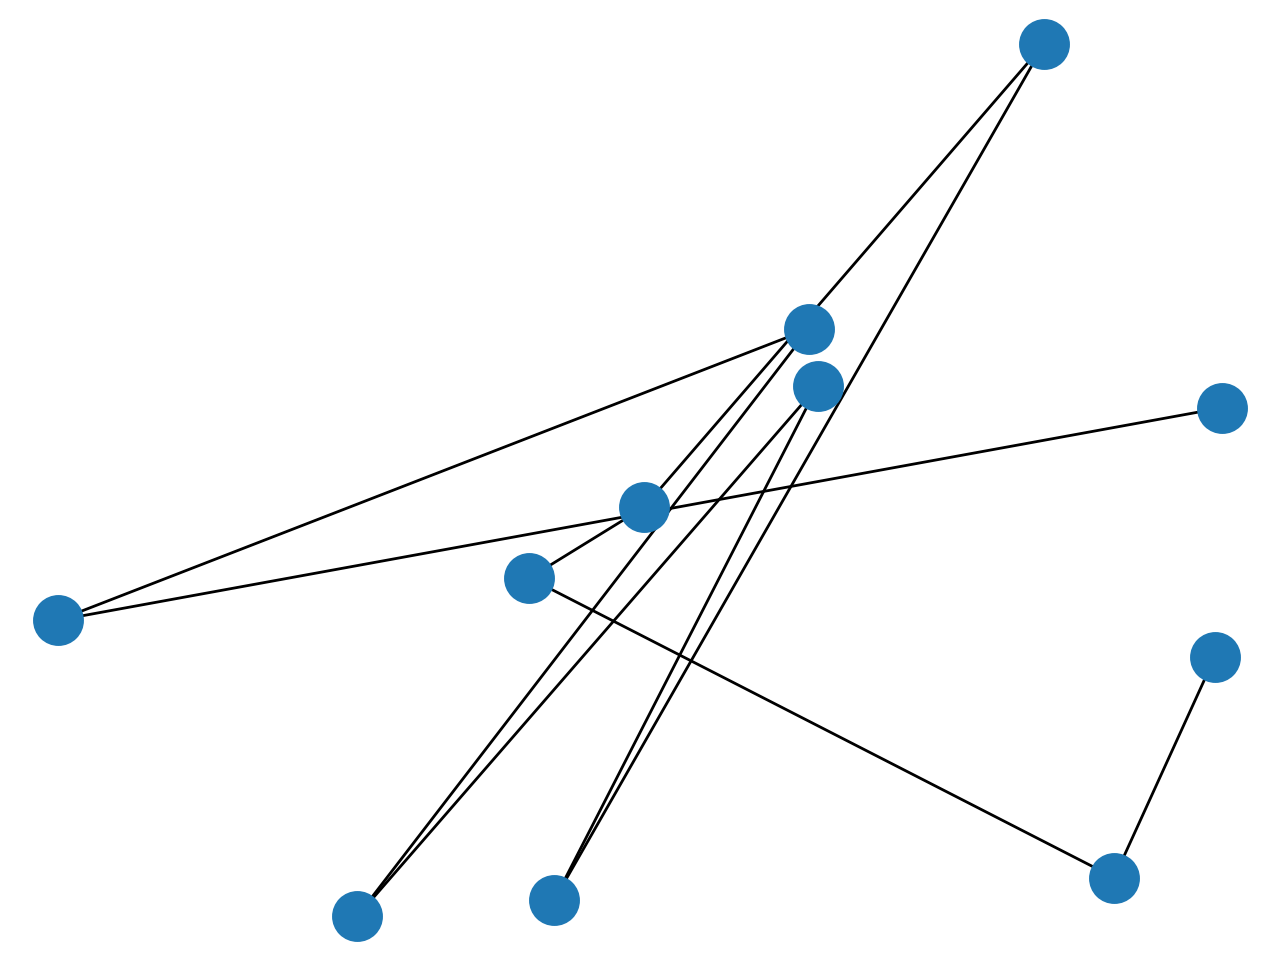

In [50]:
plt.figure()
nx.draw(G,pos)
plt.show()